# HW3
## Yidan Wang 2973331278

### 1. Time Series Classiﬁcation

### a/b/c
### (b) preprocess the raw data, join them and split to test and train data.
### (c) Feature Extraction

In [1]:
# load the data and packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
from scipy import stats
import statsmodels.api as sm
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, RocCurveDisplay, accuracy_score
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB



data_dict = {}
dic_path = '../data/AReM'

for root,dirs,files in os.walk(dic_path):
    for dir in dirs:
        if dir == ".ipynb_checkpoints":
            continue
        dir_path2 = os.path.join(root,dir)
        # print("the directionary is ", dir)
        train_df = pd.DataFrame()
        test_df = pd.DataFrame()
        low_dict = {}
        for root2,dirs2,files2 in os.walk(dir_path2):
            files2 = [f for f in files2 if not f[0] == '.']
            dirs2[:] = [d for d in dirs2 if not d[0] == '.']
            for file2 in sorted(files2):
                if file2 == ".DS_Store":
                    continue
                else:
                    file_path = os.path.join(root2,file2)
                    if dir == "bending2" and file2 == "dataset4.csv":
                        df = pd.read_csv(file_path,skiprows=5,sep="\\s+",header=None, 
                                     names = ["# Columns: time", "avg_rss12", "var_rss12", "avg_rss13", "var_rss13", "avg_rss23", "var_rss23"])
                        
                    else:
                        df = pd.read_csv(file_path,skiprows=4,sep=",")
                    low_dict[file2[:-4]] = df
        data_dict[dir]= low_dict       

#### iii. Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python’s bootstrapped or any other method to build a 90% bootsrap conﬁdence interval for the standard deviation of each feature.

In [2]:
td_all = pd.DataFrame()

def timedomain(df):
    raw = df.describe().T[1:]
    raw.drop("count", axis=1, inplace=True)
    raw = raw.rename(index={"avg_rss12":"1","var_rss12":"2", "avg_rss13":"3","var_rss13":"4","avg_rss23":"5","var_rss23":"6"},columns={"50%":"median"})
    raw = raw.unstack().to_frame().sort_index(level=1).T
    raw.columns = raw.columns.map('_'.join)
    return raw

for key in data_dict.keys():
    for file in data_dict[key].keys():
        df = data_dict[key][file]
        td = timedomain(df)
        td_all = td_all.append(td)

td_all.index = range(1,len(td_all) + 1)
display(td_all)

,25%_1,75%_1,max_1,mean_1,median_1,min_1,std_1,25%_2,75%_2,max_2,...,median_5,min_5,std_5,25%_6,75%_6,max_6,mean_6,median_6,min_6,std_6
1,39.25,42.0000,45.00,40.624792,40.50,37.25,1.476967,0.00,0.5000,1.30,...,35.00,27.25,2.188449,0.0000,1.3000,1.92,0.570583,0.430,0.0,0.582915
2,42.00,43.6700,45.67,42.812812,42.50,38.00,1.435550,0.00,0.5000,1.22,...,33.00,27.67,1.995255,0.0000,1.3000,3.11,0.571083,0.430,0.0,0.601010
3,43.00,45.0000,47.40,43.954500,44.33,35.00,1.558835,0.00,0.5000,1.70,...,36.00,29.00,1.999604,0.0000,0.9400,1.79,0.493292,0.430,0.0,0.513506
4,39.15,45.0000,47.75,42.179812,43.50,33.00,3.670666,0.00,1.1200,3.00,...,35.00,20.00,3.849448,0.0000,1.0000,2.18,0.613521,0.500,0.0,0.524317
5,41.33,42.7500,45.75,41.678063,41.75,33.00,2.243490,0.43,0.7100,2.83,...,30.00,23.67,2.411026,0.0000,0.5000,1.79,0.383292,0.430,0.0,0.389164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,34.25,39.3725,44.33,36.687292,36.00,26.50,3.529404,1.41,4.2625,12.89,...,16.75,3.00,2.978238,1.9125,4.0875,8.19,3.073313,2.690,0.0,1.629675
85,34.50,40.2500,45.00,37.114313,36.25,25.33,3.710385,1.30,3.7175,10.84,...,16.67,6.75,2.847876,1.7000,4.0375,9.50,3.076354,2.770,0.0,1.824534
86,34.50,39.7500,44.75,36.863375,36.33,26.75,3.555787,1.22,4.0225,11.68,...,16.75,8.00,2.655906,1.6400,3.6325,8.81,2.773313,2.590,0.0,1.569919
87,34.50,40.2500,44.25,36.957458,36.29,26.25,3.434863,1.25,3.3500,8.64,...,16.33,2.00,2.851673,1.6600,4.0300,8.34,2.934625,2.525,0.0,1.631380


In [3]:
# bootstrap
res_dict = {}
for i in td_all.columns.tolist():
    # 90% a=0.1
    res = bs.bootstrap(td_all[i].values, stat_func=bs_stats.std, alpha=0.1, num_iterations=10000)
    res_dict[i] = [res.value, res.lower_bound, res.upper_bound]
    
res_c = pd.DataFrame(res_dict).T
res_c = res_c.rename(columns={0:"std", 1:"lowerbound", 2:"upperbound"})

#res_dict.to_df
display(res_c.sort_values(by='std',ascending=False))

,std,lowerbound,upperbound
min_1,9.515445,8.349262,10.809241
25%_1,6.118526,5.614513,6.686088
min_5,6.089107,4.693345,7.772615
25%_5,6.061727,4.954149,7.356674
median_5,5.780655,4.677241,7.066123
max_5,5.708524,4.886134,6.683434
mean_5,5.643253,4.593488,6.877941
75%_5,5.500200,4.506935,6.679902
median_1,5.409056,4.850365,6.052455
mean_1,5.305314,4.754055,5.917305


#### iv. Use your judgement to select the three most important time-domain features (one option may be min, mean, and max).
#### to find the large std features, I found the top three features of every series and thus choose min, max and mean

### (d) Binary Classiﬁcation Using Logistic Regression

#### i. Assume that you want to use the training set to classify bending from other activities, i.e. you have a binary classiﬁcation problem. Depict scatter plots of the features you speciﬁed in 1(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities. (See p. 129 of the textbook).

,max_1,mean_1,min_1,max_2,mean_2,min_2,max_3,mean_3,min_3,max_4,mean_4,min_4,max_5,mean_5,min_5,max_6,mean_6,min_6,label
1,47.40,43.954500,35.00,1.70,0.426250,0.0,29.75,22.122354,6.50,4.44,0.497312,0.0,38.50,35.588458,29.00,1.79,0.493292,0.0,1
2,47.75,42.179812,33.00,3.00,0.696042,0.0,30.00,22.183625,8.50,5.15,0.989917,0.0,38.67,33.493917,20.00,2.18,0.613521,0.0,1
3,45.75,41.678063,33.00,2.83,0.535979,0.0,28.25,19.006563,3.00,6.42,0.841875,0.0,37.50,29.857083,23.67,1.79,0.383292,0.0,1
4,48.00,43.454958,37.00,1.58,0.378083,0.0,27.00,15.793333,5.75,10.03,0.849354,0.0,33.50,23.034792,8.00,5.26,0.679646,0.0,1
5,48.00,43.969125,36.25,1.50,0.413125,0.0,26.33,15.868021,1.50,5.17,0.666354,0.0,30.75,22.103750,11.33,2.96,0.555312,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,44.33,36.687292,26.50,12.89,2.973042,0.0,28.25,18.396792,8.33,9.63,2.976604,0.0,24.67,16.480000,3.00,8.19,3.073313,0.0,0
66,45.00,37.114313,25.33,10.84,2.730000,0.0,27.25,16.663917,3.00,10.57,3.138542,0.0,23.33,16.487542,6.75,9.50,3.076354,0.0,0
67,44.75,36.863375,26.75,11.68,2.757312,0.0,27.00,16.494750,7.00,9.01,3.013604,0.0,23.00,16.581146,8.00,8.81,2.773313,0.0,0
68,44.25,36.957458,26.25,8.64,2.420083,0.0,26.50,15.313417,7.00,8.06,2.784146,0.0,22.25,15.989167,2.00,8.34,2.934625,0.0,0


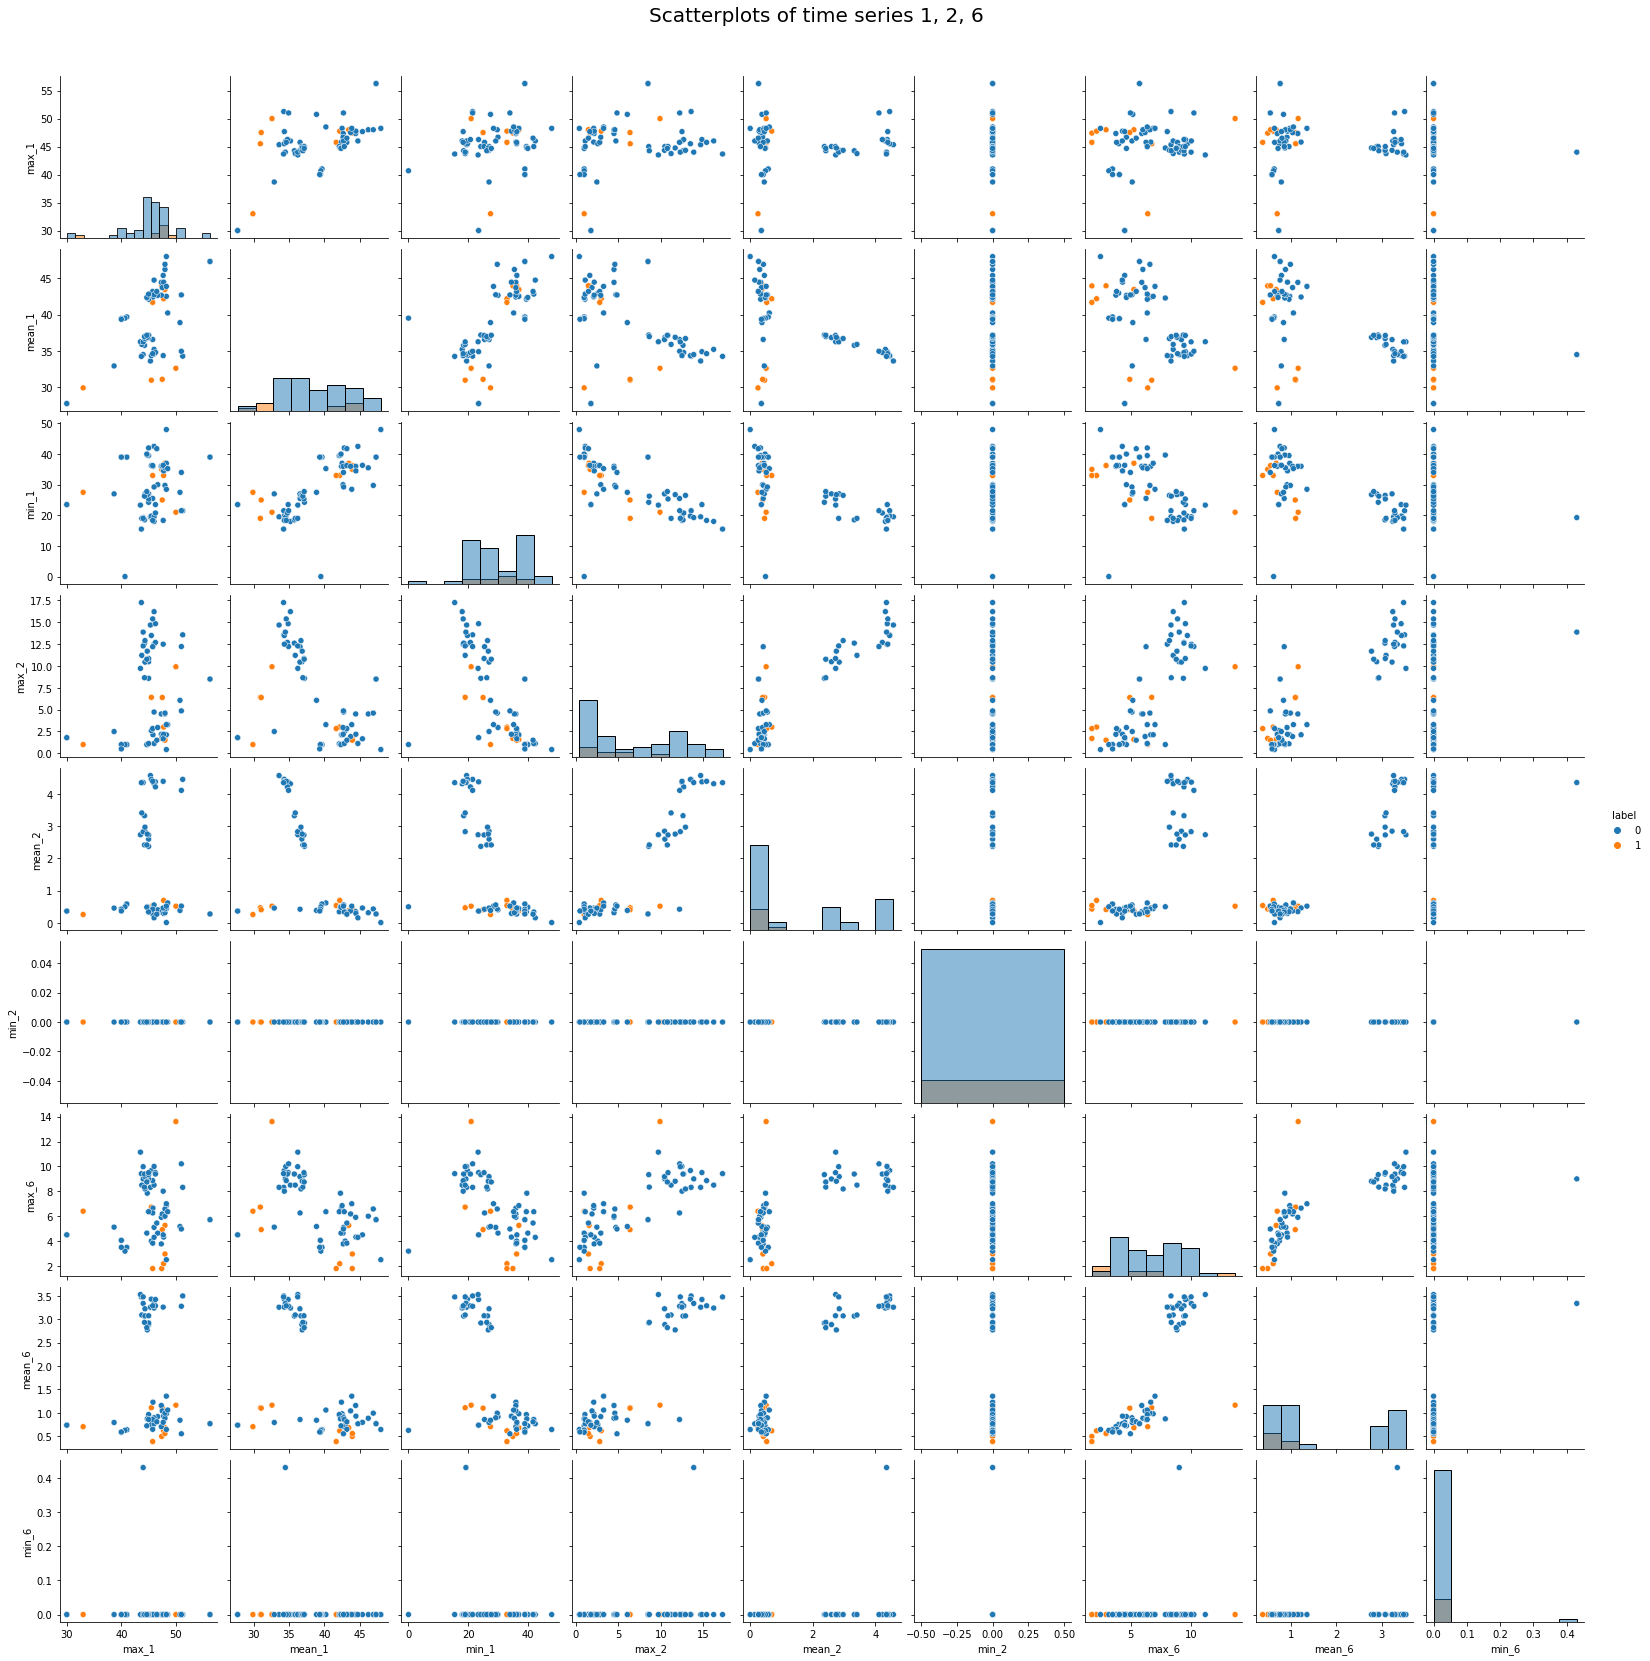

In [4]:
def timedomain_three(df):
    raw = df.describe().T[1:]
    raw = raw[["min", "max", "mean"]]
    raw = raw.rename(index={"avg_rss12":"1","var_rss12":"2", "avg_rss13":"3","var_rss13":"4","avg_rss23":"5","var_rss23":"6"})
    raw = raw.unstack().to_frame().sort_index(level=1).T
    raw.columns = raw.columns.map('_'.join)
    return raw

def timedomain_split(df, n=2):    
    r = pd.DataFrame()
    n_list = np.arange(0,len(df),n).astype(int).tolist()
    for i in range(n):
        if i == n-1:
            df_new = df[n_list[i]:] 
        else:
            df_new = df[n_list[i]:n_list[i+1]] 
        raw = df_new.describe().T[1:]
        raw = raw[["min", "max", "mean"]]
        index_list = [str(x+1) + '_' + str(i+1) for x in range(6)]
        raw = raw.rename(index={"avg_rss12":index_list[0],"var_rss12":index_list[1], "avg_rss13":index_list[2],"var_rss13":index_list[3],
                                "avg_rss23":index_list[4],"var_rss23":index_list[5]})
        raw = raw.unstack().to_frame().sort_index(level=1).T
        raw.columns = raw.columns.map('_'.join)
        if r.empty:
            r = raw
        else:
            r = r.join(raw)
    return r

def load_data_from_dict(n=1, test=False):
    td_blend_train = pd.DataFrame()
    td_other_train = pd.DataFrame()
    td_blend_test = pd.DataFrame()
    td_other_test = pd.DataFrame()
    for key in data_dict.keys():
        for file in data_dict[key].keys():
            df = data_dict[key][file]
            if key in ["bending1", "bending2"]:
                if file in ["dataset1", "dataset2"]:
                    # for test data
                    if n == 1 :
                        td = timedomain_three(df)
                    else:
                        td = timedomain_split(df, n)
                    td_blend_test = td_blend_test.append(td)          
                else:
                    if n == 1 :
                        td = timedomain_three(df)
                    else:
                        td = timedomain_split(df, n)
                    td_blend_train = td_blend_train.append(td)
            else:
                if file in ["dataset1", "dataset2","dataset3"]:
                    if n == 1 :
                        td = timedomain_three(df)
                    else:
                        td = timedomain_split(df, n)
                    td_other_test = td_other_test.append(td)
                else:
                    if n == 1 :
                        td = timedomain_three(df)
                    else:
                        td = timedomain_split(df, n)
                    td_other_train = td_other_train.append(td)
    if test:
        return td_blend_train, td_other_train, td_blend_test, td_other_test
    else:
        return td_blend_train, td_other_train


# draw scatter plot 1 2 6
td_blend_train, td_other_train = load_data_from_dict()
td_blend_train['label'] = 1
td_other_train['label'] = 0
td_train = td_blend_train.append(td_other_train)
td_train.index = range(1,len(td_train) + 1)
display(td_train.head(88))

g1 = sns.pairplot(
    data=td_train[["max_1","mean_1","min_1","max_2","mean_2","min_2","max_6","mean_6","min_6","label"]], kind="scatter", diag_kind="hist", hue="label"
)
g1.fig.suptitle("Scatterplots of time series 1, 2, 6", y=1.03, fontsize=20)
plt.show()

#### ii. Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the training instances, you have 12 time series for each training instance. Repeat the experiment in 1(d)i, i.e depict scatter plots of the features extracted from both parts of the time series 1,2, and 12. Do you see any considerable diﬀerence in the results with those of 1(d)i?


#### ANSWER

**The difference between two classes becomes clearer when breaking the time series**

,max_1_1,mean_1_1,min_1_1,max_2_1,mean_2_1,min_2_1,max_3_1,mean_3_1,min_3_1,max_4_1,...,max_4_2,mean_4_2,min_4_2,max_5_2,mean_5_2,min_5_2,max_6_2,mean_6_2,min_6_2,label
1,42.00,41.750,41.50,0.71,0.605,0.50,21.25,20.750,20.25,1.48,...,4.44,0.495397,0.0,38.50,35.609226,29.00,1.79,0.493075,0.0,1
2,47.50,47.415,47.33,0.50,0.485,0.47,29.00,28.500,28.00,1.22,...,5.15,0.989791,0.0,38.67,33.487092,20.00,2.18,0.613368,0.0,1
3,44.50,44.415,44.33,0.50,0.485,0.47,24.00,23.875,23.75,0.43,...,6.42,0.844498,0.0,37.50,29.855962,23.67,1.79,0.383996,0.0,1
4,41.25,41.125,41.00,1.30,1.150,1.00,24.00,23.250,22.50,1.12,...,10.03,0.850565,0.0,31.50,22.993452,8.00,5.26,0.678703,0.0,1
5,42.00,42.000,42.00,0.00,0.000,0.00,18.50,18.250,18.00,0.50,...,5.17,0.668096,0.0,30.75,22.147427,13.00,2.96,0.555669,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,39.33,36.165,33.00,2.45,2.405,2.36,20.25,17.625,15.00,4.24,...,9.63,2.976172,0.0,24.67,16.481653,3.00,8.19,3.078494,0.0,0
66,37.00,35.665,34.33,2.36,1.680,1.00,20.25,20.125,20.00,10.57,...,8.96,3.116674,0.0,23.33,16.487657,6.75,9.50,3.082071,0.0,0
67,39.00,35.750,32.50,3.50,2.160,0.82,11.33,10.540,9.75,4.92,...,9.01,3.011151,0.0,23.00,16.577301,8.00,8.81,2.780397,0.0,0
68,42.25,41.250,40.25,1.48,0.955,0.43,15.50,15.415,15.33,3.91,...,8.06,2.782406,0.0,22.25,15.980753,2.00,8.34,2.940941,0.0,0


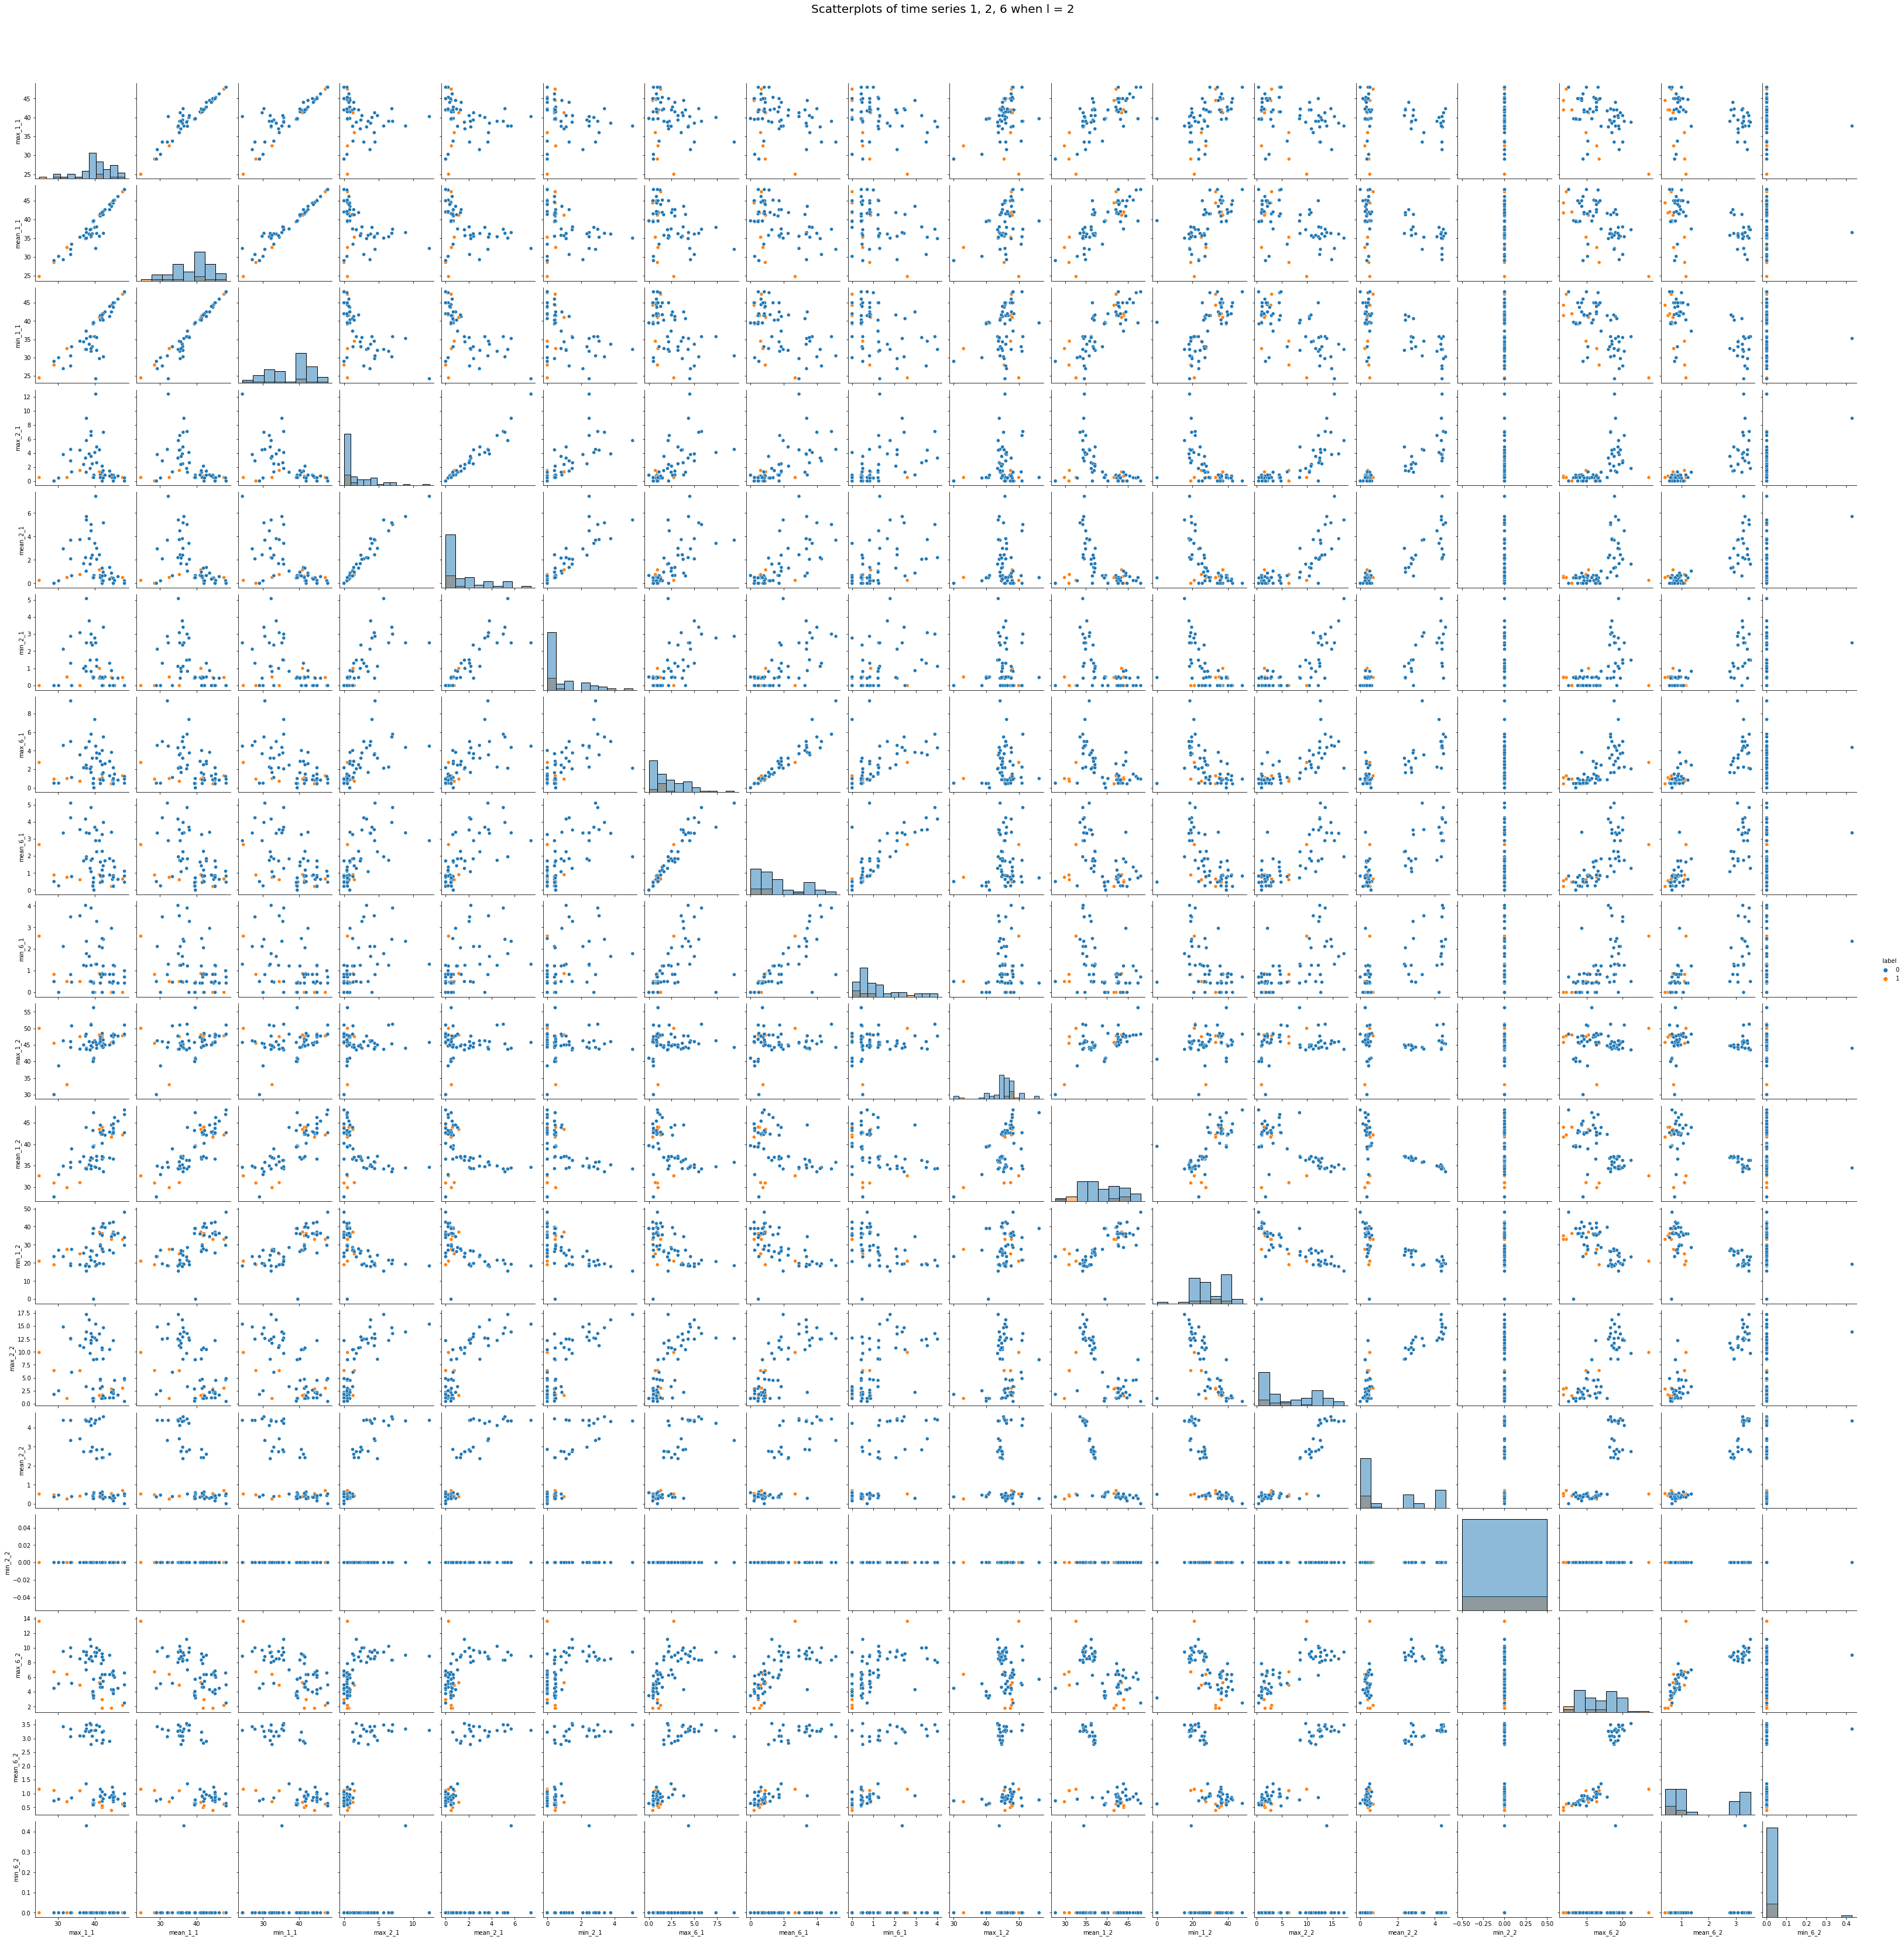

In [5]:
# draw scatter plot 1 2 6 when l = 2
td_blend_train2, td_other_train2 = load_data_from_dict(n=2)
td_blend_train2['label'] = 1
td_other_train2['label'] = 0
td_train2 = td_blend_train2.append(td_other_train2)
td_train2.index = range(1,len(td_train2) + 1)
display(td_train2)

g1 = sns.pairplot(
    data=td_train2[["max_1_1","mean_1_1","min_1_1","max_2_1","mean_2_1","min_2_1","max_6_1","mean_6_1","min_6_1",
                    "max_1_2","mean_1_2","min_1_2","max_2_2","mean_2_2","min_2_2", "max_6_2","mean_6_2","min_6_2","label"]], 
    kind="scatter", diag_kind="hist", hue="label"
)
g1.fig.suptitle("Scatterplots of time series 1, 2, 6 when l = 2", y=1.03, fontsize=20)
plt.show()

#### iii. Break each time series in your training set into l ∈ { 1, 2, . . . , 20 } time series of approximately equal length and use logistic regression to solve the binary classiﬁcation problem, using time-domain features. Remember that breaking each of the time series does not change the number of instances. It only changes the number of features for each instance. Calculate the p-values for your logistic regression parameters in each model corresponding to each value of l and reﬁt a logistic regression model using your pruned set of features.6  
Alternatively, you can use backward selection using sklearn.feature selection or glm in R. 
Use 5-fold cross-validation to determine the best value of the pair (l, p), where p is the number of features used in recursive feature elimination. Explain what the right way and the wrong way are to perform cross-validation in this problem. 7 Obviously, use the right way! 

### ANSWER:

**We should perform CV before features selection**


 Also, you may encounter the problem of class imbalance, which may make some of your folds not having any instances of the rare class. In such a case, you can use stratiﬁed cross validation. Research what it means and use it if needed. In the following, you can see an example of applying Python’s Recursive Feature Elimination, which is a backward selection algorithm, to logistic regression.

#### iv. Report the confusion matrix and show the ROC and AUC for your classiﬁer on train data. Report the parameters of your logistic regression βi’s as well as the p-values associated with them.


In [13]:
from warnings import filterwarnings
filterwarnings('ignore')

def p_sm(y_train, x_train):
    stats_logit = sm.Logit(y_train, x_train)
    lr = stats_logit.fit(method='bfgs')
    display(lr.pvalues)

rfe_res = {}
support_dict = {}
x_new_dict = {}
new_para_list = {}
p_list = []
l_list = [ i+1 for i in range(20)]
cv_accu = []
test_accu = []
cv_score_list = []

for i in range(20):
    l = i + 1
    td_blend_train, td_other_train, td_blend_test, td_other_test = load_data_from_dict(n=l,test=True)
    td_blend_train['label'] = 1
    td_other_train['label'] = 0
    td_train = td_blend_train.append(td_other_train)
    td_train.index = range(1,len(td_train) + 1)

    td_blend_test['label'] = 1
    td_other_test['label'] = 0
    td_test = td_blend_test.append(td_other_test)
    td_test.index = range(1,len(td_test) + 1)
    
    clf = LogisticRegression(penalty="none", solver='lbfgs')
    
    rfecv = RFECV(estimator=clf, step=1, cv=5, n_jobs=-1)
    rfecv.fit(td_train.iloc[:,:-1], td_train["label"])
    
    X_new = rfecv.transform(td_train.iloc[:,:-1])
    x_new_dict[l] = X_new
    p_list.append(rfecv.n_features_)
    
    cv_score = max(rfecv.cv_results_['mean_test_score'])
    cv_score_list.append(cv_score)
    
    print("When l = %d , Optimal number of features : %d , with cv score is %s" % (l, rfecv.n_features_, cv_score))
    support_dict[l] = rfecv.support_
    rfe_res[l] = rfecv.n_features_
    y_predict = rfecv.predict(td_train.iloc[:,:-1])
    my_confusion_matrix = confusion_matrix(td_train["label"], y_predict)
    cm_df = pd.DataFrame(my_confusion_matrix, columns=["predicted other","predicted bending"], index=["Other", "Bending"])
    print("The Confusion Matrix of (l, p) is (%d, %d) " % (l, rfecv.n_features_))
    display(cm_df)
    
    print('AUC of (%d, %d) is %s' % (l, rfecv.n_features_ , roc_auc_score(td_train["label"], y_predict)))
    cv_accu.append(accuracy_score(td_train["label"], y_predict))
    
    print('The parameter and p-value of (%d, %d) :' % (l, rfecv.n_features_))    
    new_para = []
    for i in range(len(rfecv.support_)):
        if rfecv.support_[i]:
            new_para.append(td_train.columns.tolist()[:-1][i])
    new_para_list[l] = new_para
    print(new_para) 
    
    # use statsmodel to output p
    p_sm(td_train["label"], X_new)
    
                    
    y_ptest = rfecv.predict(td_test.iloc[:,:-1])
    test_accu.append(accuracy_score(td_test["label"], y_ptest))
    #print("accuracy of (%d, %d) is %d :" % (l, rfecv.n_features_ ,accuracy_score(td_test["label"], y_ptest)))

    print("\n")                    



When l = 1 , Optimal number of features : 15 , with cv score is 1.0
The Confusion Matrix of (l, p) is (1, 15) 


,predicted other,predicted bending
Other,60,0
Bending,0,9


AUC of (1, 15) is 1.0
The parameter and p-value of (1, 15) :
['max_1', 'mean_1', 'min_1', 'max_2', 'mean_2', 'max_3', 'mean_3', 'min_3', 'max_4', 'mean_4', 'max_5', 'mean_5', 'min_5', 'max_6', 'mean_6']
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32


x1     1.0
x2     1.0
x3     1.0
x4     1.0
x5     1.0
x6     1.0
x7     1.0
x8     1.0
x9     1.0
x10    1.0
x11    1.0
x12    1.0
x13    1.0
x14    1.0
x15    1.0
dtype: float64



When l = 2 , Optimal number of features : 4 , with cv score is 1.0
The Confusion Matrix of (l, p) is (2, 4) 


,predicted other,predicted bending
Other,60,0
Bending,0,9


AUC of (2, 4) is 1.0
The parameter and p-value of (2, 4) :
['max_1_1', 'max_2_2', 'max_5_2', 'min_5_2']
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 26
         Function evaluations: 29
         Gradient evaluations: 29


x1    0.999865
x2    0.999958
x3    0.999880
x4    0.999927
dtype: float64



When l = 3 , Optimal number of features : 11 , with cv score is 0.9714285714285715
The Confusion Matrix of (l, p) is (3, 11) 


,predicted other,predicted bending
Other,60,0
Bending,0,9


AUC of (3, 11) is 1.0
The parameter and p-value of (3, 11) :
['max_1_1', 'mean_1_1', 'min_3_2', 'mean_5_2', 'min_5_2', 'mean_1_3', 'max_2_3', 'max_5_3', 'mean_5_3', 'min_5_3', 'max_6_3']
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 31
         Gradient evaluations: 31


x1     0.999997
x2     0.999973
x3     0.999970
x4     0.999980
x5     0.999953
x6     0.999936
x7     0.999861
x8     0.999930
x9     0.999988
x10    0.999932
x11    0.999953
dtype: float64



When l = 4 , Optimal number of features : 13 , with cv score is 0.9714285714285715
The Confusion Matrix of (l, p) is (4, 13) 


,predicted other,predicted bending
Other,60,0
Bending,0,9


AUC of (4, 13) is 1.0
The parameter and p-value of (4, 13) :
['max_1_1', 'max_5_1', 'max_1_2', 'mean_3_2', 'min_3_2', 'min_5_2', 'max_5_3', 'mean_1_4', 'max_2_4', 'max_5_4', 'mean_5_4', 'min_5_4', 'max_6_4']
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 31
         Gradient evaluations: 31


x1     0.999857
x2     0.999735
x3     0.999892
x4     0.999994
x5     0.999993
x6     0.999941
x7     0.999972
x8     0.999826
x9     0.999862
x10    0.999653
x11    0.999940
x12    0.999780
x13    0.999917
dtype: float64



When l = 5 , Optimal number of features : 50 , with cv score is 0.9571428571428571
The Confusion Matrix of (l, p) is (5, 50) 


,predicted other,predicted bending
Other,60,0
Bending,0,9


AUC of (5, 50) is 1.0
The parameter and p-value of (5, 50) :
['max_1_1', 'mean_1_1', 'max_2_1', 'mean_2_1', 'min_3_1', 'max_5_1', 'min_5_1', 'max_1_2', 'min_1_2', 'max_2_2', 'mean_3_2', 'min_3_2', 'max_5_2', 'mean_5_2', 'min_5_2', 'max_6_2', 'mean_6_2', 'max_1_3', 'min_1_3', 'max_2_3', 'mean_2_3', 'max_3_3', 'mean_3_3', 'min_3_3', 'mean_5_3', 'min_5_3', 'max_6_3', 'max_1_4', 'mean_1_4', 'max_2_4', 'mean_2_4', 'mean_3_4', 'min_3_4', 'max_5_4', 'mean_5_4', 'max_6_4', 'mean_6_4', 'max_1_5', 'mean_1_5', 'min_1_5', 'max_2_5', 'mean_2_5', 'max_3_5', 'min_3_5', 'mean_4_5', 'max_5_5', 'mean_5_5', 'min_5_5', 'max_6_5', 'mean_6_5']
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 30
         Gradient evaluations: 30


x1     1.0
x2     1.0
x3     1.0
x4     1.0
x5     1.0
x6     1.0
x7     1.0
x8     1.0
x9     1.0
x10    1.0
x11    1.0
x12    1.0
x13    1.0
x14    1.0
x15    1.0
x16    1.0
x17    1.0
x18    1.0
x19    1.0
x20    1.0
x21    1.0
x22    1.0
x23    1.0
x24    1.0
x25    1.0
x26    1.0
x27    1.0
x28    1.0
x29    1.0
x30    1.0
x31    1.0
x32    1.0
x33    1.0
x34    1.0
x35    1.0
x36    1.0
x37    1.0
x38    1.0
x39    1.0
x40    1.0
x41    1.0
x42    1.0
x43    1.0
x44    1.0
x45    1.0
x46    1.0
x47    1.0
x48    1.0
x49    1.0
x50    1.0
dtype: float64



When l = 6 , Optimal number of features : 14 , with cv score is 0.9428571428571428
The Confusion Matrix of (l, p) is (6, 14) 


,predicted other,predicted bending
Other,60,0
Bending,0,9


AUC of (6, 14) is 1.0
The parameter and p-value of (6, 14) :
['min_3_1', 'max_5_1', 'mean_5_2', 'max_1_4', 'min_3_4', 'max_1_5', 'max_5_5', 'mean_5_5', 'mean_1_6', 'max_2_6', 'max_5_6', 'mean_5_6', 'min_5_6', 'max_6_6']
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 31
         Gradient evaluations: 31


x1     0.999999
x2     0.999999
x3     0.999995
x4     1.000000
x5     0.999999
x6     1.000000
x7     1.000000
x8     1.000000
x9     1.000000
x10    0.999996
x11    0.999994
x12    1.000000
x13    0.999999
x14    1.000000
dtype: float64



When l = 7 , Optimal number of features : 12 , with cv score is 0.9428571428571428
The Confusion Matrix of (l, p) is (7, 12) 


,predicted other,predicted bending
Other,60,0
Bending,0,9


AUC of (7, 12) is 1.0
The parameter and p-value of (7, 12) :
['max_1_4', 'max_5_4', 'max_5_5', 'min_5_5', 'min_3_6', 'mean_5_6', 'min_5_6', 'max_1_7', 'mean_1_7', 'max_5_7', 'min_5_7', 'max_6_7']
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 26
         Function evaluations: 30
         Gradient evaluations: 30


x1     0.999918
x2     0.999985
x3     0.999698
x4     0.999976
x5     0.999916
x6     0.999994
x7     0.999948
x8     0.999979
x9     0.999980
x10    0.999874
x11    0.999836
x12    0.999880
dtype: float64



When l = 8 , Optimal number of features : 111 , with cv score is 0.9571428571428571
The Confusion Matrix of (l, p) is (8, 111) 


,predicted other,predicted bending
Other,60,0
Bending,0,9


AUC of (8, 111) is 1.0
The parameter and p-value of (8, 111) :
['max_1_1', 'mean_1_1', 'min_1_1', 'max_2_1', 'mean_2_1', 'min_2_1', 'max_3_1', 'mean_3_1', 'min_3_1', 'min_4_1', 'max_5_1', 'mean_5_1', 'max_6_1', 'mean_6_1', 'min_6_1', 'max_1_2', 'mean_1_2', 'min_1_2', 'max_2_2', 'mean_2_2', 'max_3_2', 'mean_3_2', 'min_3_2', 'mean_4_2', 'max_5_2', 'mean_5_2', 'min_5_2', 'max_6_2', 'mean_6_2', 'max_1_3', 'mean_1_3', 'min_1_3', 'max_2_3', 'mean_2_3', 'max_3_3', 'mean_3_3', 'min_3_3', 'max_5_3', 'mean_5_3', 'min_5_3', 'max_6_3', 'mean_6_3', 'max_1_4', 'mean_1_4', 'min_1_4', 'max_2_4', 'mean_2_4', 'min_3_4', 'min_4_4', 'max_5_4', 'mean_5_4', 'min_5_4', 'max_6_4', 'mean_6_4', 'min_6_4', 'max_1_5', 'mean_1_5', 'max_2_5', 'mean_2_5', 'max_3_5', 'mean_3_5', 'min_3_5', 'max_5_5', 'mean_5_5', 'min_5_5', 'max_6_5', 'mean_6_5', 'min_6_5', 'max_1_6', 'mean_1_6', 'min_1_6', 'max_2_6', 'mean_2_6', 'max_3_6', 'mean_3_6', 'min_3_6', 'max_5_6', 'mean_5_6', 'min_5_6', 'max_6_6', 'mean_6_6', 'max_1_7', 'mea

x1     NaN
x2     NaN
x3     NaN
x4     NaN
x5     NaN
        ..
x107   NaN
x108   NaN
x109   NaN
x110   NaN
x111   NaN
Length: 111, dtype: float64



When l = 9 , Optimal number of features : 2 , with cv score is 0.9714285714285715
The Confusion Matrix of (l, p) is (9, 2) 


,predicted other,predicted bending
Other,59,1
Bending,1,8


AUC of (9, 2) is 0.936111111111111
The parameter and p-value of (9, 2) :
['min_5_4', 'min_5_8']
Optimization terminated successfully.
         Current function value: 0.596764
         Iterations: 7
         Function evaluations: 10
         Gradient evaluations: 10


x1    0.143816
x2    0.666577
dtype: float64



When l = 10 , Optimal number of features : 17 , with cv score is 0.9571428571428571
The Confusion Matrix of (l, p) is (10, 17) 


,predicted other,predicted bending
Other,60,0
Bending,0,9


AUC of (10, 17) is 1.0
The parameter and p-value of (10, 17) :
['min_3_1', 'max_5_1', 'max_1_3', 'min_3_4', 'min_5_4', 'mean_5_5', 'min_5_5', 'mean_3_7', 'min_3_7', 'mean_5_7', 'min_5_7', 'max_5_8', 'min_5_8', 'max_1_9', 'max_1_10', 'mean_1_10', 'min_5_10']
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 24
         Function evaluations: 29
         Gradient evaluations: 29


x1     0.999330
x2     0.999287
x3     0.999748
x4     0.999977
x5     0.999834
x6     0.999948
x7     0.999864
x8     0.999722
x9     0.999952
x10    0.999822
x11    0.998773
x12    0.999851
x13    0.999920
x14    0.999496
x15    0.999859
x16    0.999724
x17    0.999920
dtype: float64



When l = 11 , Optimal number of features : 15 , with cv score is 0.9571428571428571
The Confusion Matrix of (l, p) is (11, 15) 


,predicted other,predicted bending
Other,60,0
Bending,0,9


AUC of (11, 15) is 1.0
The parameter and p-value of (11, 15) :
['min_3_1', 'max_5_1', 'mean_5_1', 'max_1_3', 'min_3_4', 'min_5_4', 'min_3_5', 'mean_5_5', 'min_3_6', 'min_5_6', 'mean_5_7', 'min_5_7', 'max_1_11', 'mean_1_11', 'min_5_11']
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 31
         Gradient evaluations: 31


x1     0.999998
x2     0.999999
x3     0.999999
x4     0.999999
x5     0.999999
x6     0.999996
x7     0.999998
x8     1.000000
x9     0.999998
x10    0.999998
x11    0.999999
x12    0.999995
x13    0.999985
x14    0.999999
x15    0.999997
dtype: float64



When l = 12 , Optimal number of features : 3 , with cv score is 0.9714285714285715
The Confusion Matrix of (l, p) is (12, 3) 


,predicted other,predicted bending
Other,59,1
Bending,1,8


AUC of (12, 3) is 0.936111111111111
The parameter and p-value of (12, 3) :
['min_5_3', 'min_5_6', 'mean_1_12']
Optimization terminated successfully.
         Current function value: 0.045280
         Iterations: 22
         Function evaluations: 25
         Gradient evaluations: 25


x1    0.716353
x2    0.250333
x3    0.044341
dtype: float64



When l = 13 , Optimal number of features : 13 , with cv score is 0.9857142857142858
The Confusion Matrix of (l, p) is (13, 13) 


,predicted other,predicted bending
Other,60,0
Bending,0,9


AUC of (13, 13) is 1.0
The parameter and p-value of (13, 13) :
['mean_5_3', 'min_5_3', 'mean_5_4', 'min_5_4', 'mean_5_6', 'min_5_6', 'max_1_9', 'max_1_10', 'mean_5_11', 'min_5_11', 'min_5_12', 'max_1_13', 'mean_1_13']
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 29
         Gradient evaluations: 29


x1     1.000000
x2     0.999999
x3     0.999999
x4     1.000000
x5     0.999999
x6     0.999993
x7     0.999998
x8     0.999995
x9     0.999996
x10    0.999999
x11    0.999994
x12    0.999998
x13    0.999982
dtype: float64



When l = 14 , Optimal number of features : 9 , with cv score is 0.9714285714285715
The Confusion Matrix of (l, p) is (14, 9) 


,predicted other,predicted bending
Other,60,0
Bending,0,9


AUC of (14, 9) is 1.0
The parameter and p-value of (14, 9) :
['mean_5_3', 'min_5_3', 'mean_5_4', 'min_5_5', 'max_1_9', 'mean_5_10', 'min_5_10', 'min_5_11', 'mean_1_14']
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 26
         Function evaluations: 29
         Gradient evaluations: 29


x1    0.999971
x2    0.999979
x3    0.999988
x4    0.999961
x5    0.999981
x6    0.999993
x7    0.999971
x8    0.999985
x9    0.999953
dtype: float64



When l = 15 , Optimal number of features : 4 , with cv score is 0.9714285714285715
The Confusion Matrix of (l, p) is (15, 4) 


,predicted other,predicted bending
Other,60,0
Bending,0,9


AUC of (15, 4) is 1.0
The parameter and p-value of (15, 4) :
['min_5_3', 'min_5_5', 'min_5_10', 'mean_1_15']
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 28
         Gradient evaluations: 28


x1    0.999971
x2    0.999979
x3    0.998965
x4    0.999868
dtype: float64



When l = 16 , Optimal number of features : 16 , with cv score is 0.9857142857142858
The Confusion Matrix of (l, p) is (16, 16) 


,predicted other,predicted bending
Other,60,0
Bending,0,9


AUC of (16, 16) is 1.0
The parameter and p-value of (16, 16) :
['max_5_1', 'max_5_3', 'mean_5_3', 'min_5_3', 'mean_5_4', 'min_5_4', 'mean_5_5', 'min_5_5', 'max_1_8', 'mean_5_9', 'min_5_9', 'min_5_10', 'max_1_14', 'max_1_15', 'max_1_16', 'mean_1_16']
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 29
         Gradient evaluations: 29


x1     0.999988
x2     0.999976
x3     0.999999
x4     0.999999
x5     0.999992
x6     0.999995
x7     0.999998
x8     0.999993
x9     0.999994
x10    0.999997
x11    0.999990
x12    0.999993
x13    0.999992
x14    0.999960
x15    0.999976
x16    0.999957
dtype: float64



When l = 17 , Optimal number of features : 96 , with cv score is 0.9714285714285715
The Confusion Matrix of (l, p) is (17, 96) 


,predicted other,predicted bending
Other,60,0
Bending,0,9


AUC of (17, 96) is 1.0
The parameter and p-value of (17, 96) :
['min_3_1', 'max_5_1', 'mean_5_1', 'min_5_1', 'max_1_2', 'max_2_2', 'min_3_2', 'max_5_2', 'mean_5_2', 'min_5_2', 'max_1_3', 'max_2_3', 'min_3_3', 'max_5_3', 'mean_5_3', 'min_5_3', 'max_6_3', 'max_1_4', 'max_2_4', 'min_3_4', 'max_5_4', 'mean_5_4', 'min_5_4', 'max_1_5', 'max_3_5', 'mean_3_5', 'min_3_5', 'max_5_5', 'mean_5_5', 'min_5_5', 'max_5_6', 'mean_5_6', 'min_5_6', 'max_1_7', 'min_3_7', 'max_5_7', 'mean_5_7', 'max_1_8', 'mean_1_8', 'min_1_8', 'max_5_8', 'mean_5_8', 'min_5_8', 'max_6_8', 'max_1_9', 'max_2_9', 'min_3_9', 'max_4_9', 'max_5_9', 'mean_5_9', 'min_5_9', 'max_6_9', 'max_3_10', 'min_3_10', 'min_5_10', 'max_6_10', 'min_3_11', 'max_1_12', 'mean_1_12', 'max_3_12', 'mean_3_12', 'min_3_12', 'min_5_12', 'max_6_12', 'max_1_13', 'mean_1_13', 'max_3_13', 'mean_3_13', 'min_5_13', 'max_6_13', 'max_1_14', 'mean_1_14', 'min_1_14', 'max_4_14', 'max_1_15', 'mean_1_15', 'max_2_15', 'mean_3_15', 'min_3_15', 'mean_5_15', 'min_5_15

x1    NaN
x2    NaN
x3    NaN
x4    NaN
x5    NaN
       ..
x92   NaN
x93   NaN
x94   NaN
x95   NaN
x96   NaN
Length: 96, dtype: float64



When l = 18 , Optimal number of features : 5 , with cv score is 0.9857142857142858
The Confusion Matrix of (l, p) is (18, 5) 


,predicted other,predicted bending
Other,60,0
Bending,0,9


AUC of (18, 5) is 1.0
The parameter and p-value of (18, 5) :
['min_5_3', 'mean_5_4', 'min_5_4', 'min_5_8', 'max_1_16']
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 28
         Gradient evaluations: 28


x1    0.999981
x2    0.999959
x3    0.999978
x4    0.999894
x5    0.999819
dtype: float64



When l = 19 , Optimal number of features : 5 , with cv score is 0.9857142857142858
The Confusion Matrix of (l, p) is (19, 5) 


,predicted other,predicted bending
Other,60,0
Bending,0,9


AUC of (19, 5) is 1.0
The parameter and p-value of (19, 5) :
['mean_5_3', 'mean_5_4', 'min_5_4', 'min_5_7', 'max_1_15']
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 24
         Function evaluations: 27
         Gradient evaluations: 27


x1    0.999373
x2    0.999605
x3    0.998746
x4    0.996026
x5    0.995987
dtype: float64



When l = 20 , Optimal number of features : 21 , with cv score is 0.9857142857142858
The Confusion Matrix of (l, p) is (20, 21) 


,predicted other,predicted bending
Other,60,0
Bending,0,9


AUC of (20, 21) is 1.0
The parameter and p-value of (20, 21) :
['max_5_1', 'mean_5_2', 'min_5_2', 'mean_5_3', 'min_5_3', 'max_5_4', 'mean_5_4', 'min_5_4', 'mean_5_7', 'min_5_7', 'mean_5_8', 'min_5_8', 'max_1_12', 'max_1_13', 'min_5_13', 'max_1_14', 'min_5_14', 'max_1_16', 'max_1_17', 'max_1_18', 'max_1_19']
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 23
         Function evaluations: 27
         Gradient evaluations: 27


x1     0.999986
x2     0.999997
x3     0.999998
x4     0.999996
x5     0.999991
x6     0.999994
x7     0.999992
x8     0.999983
x9     0.999991
x10    0.999940
x11    0.999986
x12    0.999999
x13    0.999998
x14    0.999997
x15    0.999989
x16    0.999979
x17    0.999978
x18    0.999992
x19    0.999996
x20    0.999999
x21    0.999995
dtype: float64

#### v. Test the classiﬁer on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classiﬁer has to be tested using the features extracted from the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously.

#### ANSWER
**I choose mean_test_score in the CV, CV accuracy and test accuracy as indicators to compare. From the table below, we can found that most of the (l,p) pairs get the totally right classification result in the test data. But, combined with cv_score and cv_accuracy, the pair(1,15) and (2,4) is the best**

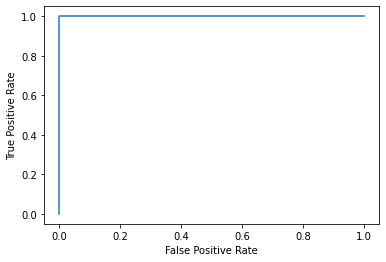

,l,p,cv_score,CV_accuracy,test_accuracy
0,1,15,1.000000,1.000000,1.000000
1,2,4,1.000000,1.000000,1.000000
2,3,11,0.971429,1.000000,1.000000
3,4,13,0.971429,1.000000,1.000000
4,5,50,0.957143,1.000000,1.000000
5,6,14,0.942857,1.000000,0.947368
6,7,12,0.942857,1.000000,0.947368
7,8,111,0.957143,1.000000,0.947368
8,9,2,0.971429,0.971014,0.947368
9,10,17,0.957143,1.000000,0.947368


In [14]:
# All the roc is just like(1) the same so just show one pic.
fpr, tpr, _ = roc_curve(td_train["label"], y_predict, pos_label= 1)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.show()


# print the result of iv 
res_df = pd.DataFrame({"l":l_list, "p":p_list, 'cv_score': cv_score_list, "CV_accuracy": cv_accu, "test_accuracy": test_accu}) 
display(res_df)

#### vi. Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?

 ##### Answer:
 ##### Yes, when I do logit using statsmodel, it shows the classes are well-separated. P values are not reliable.
 

#### vii. From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.

##### Answer:
##### Yes, there is imbalanced classes which is bending. 9/69 < 20% 
##### We can use imblearn package to case control (random under sampler to undersampling, or smoteenn methods which using both over and under sampling.) and plot the roc curve if accuracy is not 1.
##### From the result below, we can found resamping did not influence the result mostly. But for l = 13, 14, 18, the accuracy is not 1.


When l = 1 , Optimal number of features(resample) : 6
The Confusion Matrix of resampling (l, p) is (1, 6) 


,predicted other,predicted bending
Other,27,0
Bending,0,9


AUC of (1, 6) is 1.0


When l = 2 , Optimal number of features(resample) : 4
The Confusion Matrix of resampling (l, p) is (2, 4) 


,predicted other,predicted bending
Other,27,0
Bending,0,9


AUC of (2, 4) is 1.0


When l = 3 , Optimal number of features(resample) : 15
The Confusion Matrix of resampling (l, p) is (3, 15) 


,predicted other,predicted bending
Other,27,0
Bending,0,9


AUC of (3, 15) is 1.0


When l = 4 , Optimal number of features(resample) : 18
The Confusion Matrix of resampling (l, p) is (4, 18) 


,predicted other,predicted bending
Other,27,0
Bending,0,9


AUC of (4, 18) is 1.0


When l = 5 , Optimal number of features(resample) : 66
The Confusion Matrix of resampling (l, p) is (5, 66) 


,predicted other,predicted bending
Other,27,0
Bending,0,9


AUC of (5, 66) is 1.0


When l = 6 , Optimal number of features(resample) : 32
The Confusion Matrix of resampling (l, p) is (6, 32) 


,predicted other,predicted bending
Other,27,0
Bending,0,9


AUC of (6, 32) is 1.0


When l = 7 , Optimal number of features(resample) : 5
The Confusion Matrix of resampling (l, p) is (7, 5) 


,predicted other,predicted bending
Other,27,0
Bending,0,9


AUC of (7, 5) is 1.0


When l = 8 , Optimal number of features(resample) : 107
The Confusion Matrix of resampling (l, p) is (8, 107) 


,predicted other,predicted bending
Other,27,0
Bending,0,9


AUC of (8, 107) is 1.0


When l = 9 , Optimal number of features(resample) : 6
The Confusion Matrix of resampling (l, p) is (9, 6) 


,predicted other,predicted bending
Other,27,0
Bending,0,9


AUC of (9, 6) is 1.0


When l = 10 , Optimal number of features(resample) : 109
The Confusion Matrix of resampling (l, p) is (10, 109) 


,predicted other,predicted bending
Other,27,0
Bending,0,9


AUC of (10, 109) is 1.0


When l = 11 , Optimal number of features(resample) : 13
The Confusion Matrix of resampling (l, p) is (11, 13) 


,predicted other,predicted bending
Other,27,0
Bending,0,9


AUC of (11, 13) is 1.0


When l = 12 , Optimal number of features(resample) : 172
The Confusion Matrix of resampling (l, p) is (12, 172) 


,predicted other,predicted bending
Other,27,0
Bending,0,9


AUC of (12, 172) is 1.0


When l = 13 , Optimal number of features(resample) : 1
The Confusion Matrix of resampling (l, p) is (13, 1) 


,predicted other,predicted bending
Other,26,1
Bending,0,9


AUC of (13, 1) is 0.9814814814814815


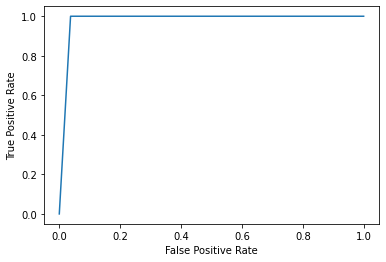



When l = 14 , Optimal number of features(resample) : 1
The Confusion Matrix of resampling (l, p) is (14, 1) 


,predicted other,predicted bending
Other,27,0
Bending,1,8


AUC of (14, 1) is 0.9444444444444444


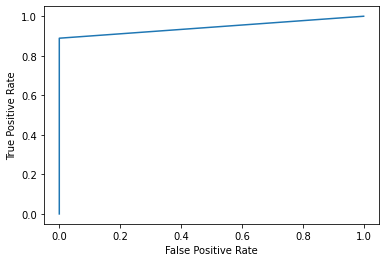



When l = 15 , Optimal number of features(resample) : 182
The Confusion Matrix of resampling (l, p) is (15, 182) 


,predicted other,predicted bending
Other,27,0
Bending,0,9


AUC of (15, 182) is 1.0


When l = 16 , Optimal number of features(resample) : 1
The Confusion Matrix of resampling (l, p) is (16, 1) 


,predicted other,predicted bending
Other,27,0
Bending,0,9


AUC of (16, 1) is 1.0


When l = 17 , Optimal number of features(resample) : 1
The Confusion Matrix of resampling (l, p) is (17, 1) 


,predicted other,predicted bending
Other,27,0
Bending,0,9


AUC of (17, 1) is 1.0


When l = 18 , Optimal number of features(resample) : 1
The Confusion Matrix of resampling (l, p) is (18, 1) 


,predicted other,predicted bending
Other,25,2
Bending,2,7


AUC of (18, 1) is 0.8518518518518517


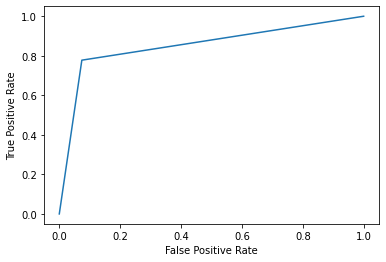



When l = 19 , Optimal number of features(resample) : 3
The Confusion Matrix of resampling (l, p) is (19, 3) 


,predicted other,predicted bending
Other,27,0
Bending,0,9


AUC of (19, 3) is 1.0


When l = 20 , Optimal number of features(resample) : 18
The Confusion Matrix of resampling (l, p) is (20, 18) 


,predicted other,predicted bending
Other,27,0
Bending,0,9


AUC of (20, 18) is 1.0




In [8]:
from imblearn.under_sampling import RandomUnderSampler



for i in range(20):
    l = i + 1
    td_blend_train, td_other_train = load_data_from_dict(n=l)
    td_blend_train['label'] = 1
    td_other_train['label'] = 0
    td_train = td_blend_train.append(td_other_train)
    td_train.index = range(1,len(td_train) + 1)
    
    #smote_enn = SMOTEENN(random_state=0)
    #X_resampled, y_resampled = smote_enn.fit_resample(td_train.iloc[:,:-1], td_train["label"])
    
    # to contorl the ratio 1:3
    rus = RandomUnderSampler(sampling_strategy=0.33, random_state=0)
    X_resampled, y_resampled = rus.fit_resample(td_train.iloc[:,:-1], td_train["label"])

    
    clf = LogisticRegression(penalty="none", solver='lbfgs')

    rfecv = RFECV(estimator=clf, step=1, cv=5, n_jobs=-1)
    rfecv.fit(X_resampled, y_resampled)
    
    print("When l = %d , Optimal number of features(resample) : %d" % (l, rfecv.n_features_))
    support_dict[l] = rfecv.support_
    y_predict2 = rfecv.predict(X_resampled)
    my_confusion_matrix2 = confusion_matrix(y_resampled, y_predict2)
    cm_df2 = pd.DataFrame(my_confusion_matrix2, columns=["predicted other","predicted bending"], index=["Other", "Bending"])
    print("The Confusion Matrix of resampling (l, p) is (%d, %d) " % (l, rfecv.n_features_))
    display(cm_df2)
    
    auc_vii = roc_auc_score(y_resampled, y_predict2)
    print('AUC of (%d, %d) is %s' % (l, rfecv.n_features_ , auc_vii ))
    if auc_vii != 1:
        fpr, tpr, _ = roc_curve(y_resampled, y_predict2, pos_label= 1)
        roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
        plt.show()
                       
    print("\n")                

### (e) Binary Classiﬁcation Using L1 -penalized logistic regression

#### i. Repeat 1(d)iii using L1 -penalized logistic regression, 8 i.e. instead of using pvalues for variable selection, use L1 regularization. Note that in this problem, you have to cross-validate for both l, the number of time series into which you break each of your instances, and λ, the weight of L1 penalty in your logistic regression objective function (or C, the budget). Packages usually perform cross-validation for λ automatically.9 


In [9]:
# use sklearn logitcv


accu_e_list = [] 
best_c_list = []
cv_score_list = []
for i in range(20):
    l = i + 1
    td_blend_train, td_other_train = load_data_from_dict(n=l)
    td_blend_train['label'] = 1
    td_other_train['label'] = 0
    td_train = td_blend_train.append(td_other_train)
    td_train.index = range(1,len(td_train) + 1)
    min_max_scaler = MinMaxScaler()
    x_train_minmax = min_max_scaler.fit_transform(td_train.iloc[:,:-1])


    
    clf_e = LogisticRegressionCV(random_state=424, penalty="l1", n_jobs=-1, solver='liblinear')
    clf_e.fit(x_train_minmax, td_train["label"])
    best_c = clf_e.C_[0]
    best_c_list.append(best_c)
    best_c_index = np.argwhere(clf_e.Cs_ == best_c)
    cv_score_list.append(np.mean(clf_e.scores_[1],axis=0)[best_c_index][0][0])
    
    
    y_e_train_predict = clf_e.predict(x_train_minmax)
    print("When l = %d , Optimal C is : %s" % (l, best_c))
    my_confusion_matrix_e = confusion_matrix(td_train["label"], y_e_train_predict)
    cm_e = pd.DataFrame(my_confusion_matrix_e, columns=["predicted other","predicted bending"], index=["Other", "Bending"])
    print("The Confusion Matrix of resampling (l, C) is (%d, %s) " % (l, best_c))
    display(cm_e)
    
    acc_e = accuracy_score(td_train["label"], y_e_train_predict)
    accu_e_list.append(acc_e)
    print("Accucary of train data when (l, C) is (%d, %s) is %s " % (l, best_c, acc_e))

                       
    print("\n")    

    

res_e = pd.DataFrame({"l":l_list, "C":best_c_list, 'mean_cv_score': cv_score_list, "CV_accuracy": accu_e_list}) 
display(res_e)



When l = 1 , Optimal C is : 2.782559402207126
The Confusion Matrix of resampling (l, C) is (1, 2.782559402207126) 


,predicted other,predicted bending
Other,60,0
Bending,1,8


Accucary of train data when (l, C) is (1, 2.782559402207126) is 0.9855072463768116 


When l = 2 , Optimal C is : 2.782559402207126
The Confusion Matrix of resampling (l, C) is (2, 2.782559402207126) 


,predicted other,predicted bending
Other,60,0
Bending,1,8


Accucary of train data when (l, C) is (2, 2.782559402207126) is 0.9855072463768116 


When l = 3 , Optimal C is : 2.782559402207126
The Confusion Matrix of resampling (l, C) is (3, 2.782559402207126) 


,predicted other,predicted bending
Other,60,0
Bending,1,8


Accucary of train data when (l, C) is (3, 2.782559402207126) is 0.9855072463768116 


When l = 4 , Optimal C is : 1291.5496650148827
The Confusion Matrix of resampling (l, C) is (4, 1291.5496650148827) 


,predicted other,predicted bending
Other,60,0
Bending,0,9


Accucary of train data when (l, C) is (4, 1291.5496650148827) is 1.0 


When l = 5 , Optimal C is : 166.81005372000558
The Confusion Matrix of resampling (l, C) is (5, 166.81005372000558) 


,predicted other,predicted bending
Other,60,0
Bending,0,9


Accucary of train data when (l, C) is (5, 166.81005372000558) is 1.0 


When l = 6 , Optimal C is : 166.81005372000558
The Confusion Matrix of resampling (l, C) is (6, 166.81005372000558) 


,predicted other,predicted bending
Other,60,0
Bending,0,9


Accucary of train data when (l, C) is (6, 166.81005372000558) is 1.0 


When l = 7 , Optimal C is : 10000.0
The Confusion Matrix of resampling (l, C) is (7, 10000.0) 


,predicted other,predicted bending
Other,60,0
Bending,0,9


Accucary of train data when (l, C) is (7, 10000.0) is 1.0 


When l = 8 , Optimal C is : 10000.0
The Confusion Matrix of resampling (l, C) is (8, 10000.0) 


,predicted other,predicted bending
Other,60,0
Bending,0,9


Accucary of train data when (l, C) is (8, 10000.0) is 1.0 


When l = 9 , Optimal C is : 1291.5496650148827
The Confusion Matrix of resampling (l, C) is (9, 1291.5496650148827) 


,predicted other,predicted bending
Other,60,0
Bending,0,9


Accucary of train data when (l, C) is (9, 1291.5496650148827) is 1.0 


When l = 10 , Optimal C is : 2.782559402207126
The Confusion Matrix of resampling (l, C) is (10, 2.782559402207126) 


,predicted other,predicted bending
Other,60,0
Bending,1,8


Accucary of train data when (l, C) is (10, 2.782559402207126) is 0.9855072463768116 


When l = 11 , Optimal C is : 1291.5496650148827
The Confusion Matrix of resampling (l, C) is (11, 1291.5496650148827) 


,predicted other,predicted bending
Other,60,0
Bending,0,9


Accucary of train data when (l, C) is (11, 1291.5496650148827) is 1.0 


When l = 12 , Optimal C is : 2.782559402207126
The Confusion Matrix of resampling (l, C) is (12, 2.782559402207126) 


,predicted other,predicted bending
Other,60,0
Bending,0,9


Accucary of train data when (l, C) is (12, 2.782559402207126) is 1.0 


When l = 13 , Optimal C is : 2.782559402207126
The Confusion Matrix of resampling (l, C) is (13, 2.782559402207126) 


,predicted other,predicted bending
Other,60,0
Bending,0,9


Accucary of train data when (l, C) is (13, 2.782559402207126) is 1.0 


When l = 14 , Optimal C is : 2.782559402207126
The Confusion Matrix of resampling (l, C) is (14, 2.782559402207126) 


,predicted other,predicted bending
Other,60,0
Bending,1,8


Accucary of train data when (l, C) is (14, 2.782559402207126) is 0.9855072463768116 


When l = 15 , Optimal C is : 2.782559402207126
The Confusion Matrix of resampling (l, C) is (15, 2.782559402207126) 


,predicted other,predicted bending
Other,60,0
Bending,0,9


Accucary of train data when (l, C) is (15, 2.782559402207126) is 1.0 


When l = 16 , Optimal C is : 2.782559402207126
The Confusion Matrix of resampling (l, C) is (16, 2.782559402207126) 


,predicted other,predicted bending
Other,60,0
Bending,0,9


Accucary of train data when (l, C) is (16, 2.782559402207126) is 1.0 


When l = 17 , Optimal C is : 2.782559402207126
The Confusion Matrix of resampling (l, C) is (17, 2.782559402207126) 


,predicted other,predicted bending
Other,60,0
Bending,0,9


Accucary of train data when (l, C) is (17, 2.782559402207126) is 1.0 


When l = 18 , Optimal C is : 2.782559402207126
The Confusion Matrix of resampling (l, C) is (18, 2.782559402207126) 


,predicted other,predicted bending
Other,60,0
Bending,1,8


Accucary of train data when (l, C) is (18, 2.782559402207126) is 0.9855072463768116 


When l = 19 , Optimal C is : 2.782559402207126
The Confusion Matrix of resampling (l, C) is (19, 2.782559402207126) 


,predicted other,predicted bending
Other,60,0
Bending,0,9


Accucary of train data when (l, C) is (19, 2.782559402207126) is 1.0 


When l = 20 , Optimal C is : 2.782559402207126
The Confusion Matrix of resampling (l, C) is (20, 2.782559402207126) 


,predicted other,predicted bending
Other,60,0
Bending,0,9


Accucary of train data when (l, C) is (20, 2.782559402207126) is 1.0 




,l,C,mean_cv_score,CV_accuracy
0,1,2.782559,0.971429,0.985507
1,2,2.782559,0.957143,0.985507
2,3,2.782559,0.941758,0.985507
3,4,1291.549665,0.941758,1.000000
4,5,166.810054,0.941758,1.000000
5,6,166.810054,0.941758,1.000000
6,7,10000.000000,0.941758,1.000000
7,8,10000.000000,0.927473,1.000000
8,9,1291.549665,0.941758,1.000000
9,10,2.782559,0.927473,0.985507


#### ii. Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement?
#### Answer:
#### We can found that when l = 1, and C = 2.782, it has the best mean cv score 0.97 but the accuracy is not 1.
#### Comparing their cv accuracy, the RFECV performs better, but using L1-penalized is more user-friendly.


In [15]:
res_e2 = pd.merge(res_df,res_e, on='l')

display(res_e2)

,l,p,cv_score,CV_accuracy_x,test_accuracy,C,mean_cv_score,CV_accuracy_y
0,1,15,1.000000,1.000000,1.000000,2.782559,0.971429,0.985507
1,2,4,1.000000,1.000000,1.000000,2.782559,0.957143,0.985507
2,3,11,0.971429,1.000000,1.000000,2.782559,0.941758,0.985507
3,4,13,0.971429,1.000000,1.000000,1291.549665,0.941758,1.000000
4,5,50,0.957143,1.000000,1.000000,166.810054,0.941758,1.000000
5,6,14,0.942857,1.000000,0.947368,166.810054,0.941758,1.000000
6,7,12,0.942857,1.000000,0.947368,10000.000000,0.941758,1.000000
7,8,111,0.957143,1.000000,0.947368,10000.000000,0.927473,1.000000
8,9,2,0.971429,0.971014,0.947368,1291.549665,0.941758,1.000000
9,10,17,0.957143,1.000000,0.947368,2.782559,0.927473,0.985507


### (f) Multi-class Classiﬁcation (The Realistic Case)

#### i. Find the best l in the same way as you found it in 1(e)i to build an L 1 penalized multinomial regression model to classify all activities in your training set. Report your test error. Research how confusion matrices and ROC curves are deﬁned for multiclass classiﬁcation and show them for this problem if possible.11 

### The best l is 20 with test error is 0.10526315789473684

In [11]:
# process the data

def load_data_from_dict_mc(n=1):
    td_train = pd.DataFrame()
    td_test = pd.DataFrame()
    
    for key in data_dict.keys():
        for file in data_dict[key].keys():
            df = data_dict[key][file]
            if key in ["bending1", "bending2"]:
                if file in ["dataset1", "dataset2"]:
                    # for test data
                    if n == 1 :
                        td = timedomain_three(df)
                    else:
                        td = timedomain_split(df, n)
                    td['label'] = "bending"
                    td_test = td_test.append(td)  
                else:
                    if n == 1 :
                        td = timedomain_three(df)
                    else:
                        td = timedomain_split(df, n)
                    td['label'] = "bending"
                    td_train = td_train.append(td)
            else:
                if file in ["dataset1", "dataset2","dataset3"]:
                    if n == 1 :
                        td = timedomain_three(df)
                    else:
                        td = timedomain_split(df, n)
                    td['label'] = key
                    td_test = td_test.append(td)
                else:
                    if n == 1 :
                        td = timedomain_three(df)
                    else:
                        td = timedomain_split(df, n)
                    td['label'] = key
                    td_train = td_train.append(td)

    return td_train, td_test


trainerror_list = []
testerror_list = []
for i in range(20):
    l = i + 1
    td_train_f, td_test_f = load_data_from_dict_mc(n=l)
    min_max_scaler = MinMaxScaler()
    x_train_minmax_f = min_max_scaler.fit_transform(td_train_f.iloc[:,:-1])
    x_test_minmax_f = min_max_scaler.fit_transform(td_test_f.iloc[:,:-1])
    clf_f = LogisticRegression(penalty="l1", solver='saga',random_state=424, multi_class='multinomial', max_iter=1000, n_jobs=-1)
    
    clf_f.fit(x_train_minmax_f, td_train_f["label"])
    
    y_f_train_predict = clf_f.predict(x_train_minmax_f)
    y_f_test_predict = clf_f.predict(x_test_minmax_f)
    
    
    # print("When l = %d , Optimal number of features : %d" % (l, rfecv.n_features_))
    my_confusion_matrix_f = confusion_matrix(td_train_f["label"], y_f_train_predict)
    print()
    cm_df_f = pd.DataFrame(my_confusion_matrix_f, columns=["predicted bending","predicted cycling", "predicted lying","predicted sitting", "predicted standing","predicted walking"], 
                           index=['bending', 'cycling', 'lying' ,'sitting', 'standing' ,'walking'])
    print("The Confusion Matrix of l is %d " % l)
    display(cm_df_f)
    train_error = 1 - accuracy_score(td_train_f["label"], y_f_train_predict)
    test_error = 1 - accuracy_score(td_test_f["label"], y_f_test_predict)
    trainerror_list.append(train_error)
    testerror_list.append(test_error)
    print("test error of l = %d is %s"% (l, test_error))
    
    
res_f = pd.DataFrame({"l":l_list, "train_error_lr":trainerror_list, "test_error_lr": testerror_list}) 
display(res_f)

 
min_test_error = min(testerror_list)

minindex = np.argwhere(testerror_list == np.amin(testerror_list)).flatten().tolist()
min_l_list = [l_list[x] for x in minindex]
best_l = min(min_l_list) 
print("The best l is", best_l, "with test error is", min_test_error)


The Confusion Matrix of l is 1 


,predicted bending,predicted cycling,predicted lying,predicted sitting,predicted standing,predicted walking
bending,8,0,1,0,0,0
cycling,0,12,0,0,0,0
lying,0,0,11,1,0,0
sitting,1,0,1,9,1,0
standing,0,0,0,4,8,0
walking,0,0,0,0,0,12


test error of l = 1 is 0.21052631578947367

The Confusion Matrix of l is 2 


,predicted bending,predicted cycling,predicted lying,predicted sitting,predicted standing,predicted walking
bending,8,0,1,0,0,0
cycling,0,12,0,0,0,0
lying,0,0,11,0,1,0
sitting,1,0,1,8,2,0
standing,0,0,0,1,11,0
walking,0,0,0,0,0,12


test error of l = 2 is 0.21052631578947367

The Confusion Matrix of l is 3 


,predicted bending,predicted cycling,predicted lying,predicted sitting,predicted standing,predicted walking
bending,8,0,1,0,0,0
cycling,0,12,0,0,0,0
lying,0,0,11,0,1,0
sitting,1,0,1,9,1,0
standing,0,0,0,1,11,0
walking,0,0,0,0,0,12


test error of l = 3 is 0.1578947368421053

The Confusion Matrix of l is 4 


,predicted bending,predicted cycling,predicted lying,predicted sitting,predicted standing,predicted walking
bending,8,0,1,0,0,0
cycling,0,12,0,0,0,0
lying,0,0,11,0,1,0
sitting,1,0,1,9,1,0
standing,0,0,0,2,10,0
walking,0,0,0,0,0,12


test error of l = 4 is 0.21052631578947367

The Confusion Matrix of l is 5 


,predicted bending,predicted cycling,predicted lying,predicted sitting,predicted standing,predicted walking
bending,8,0,1,0,0,0
cycling,0,12,0,0,0,0
lying,0,0,12,0,0,0
sitting,0,0,1,7,4,0
standing,0,0,0,2,10,0
walking,0,0,0,0,0,12


test error of l = 5 is 0.26315789473684215

The Confusion Matrix of l is 6 


,predicted bending,predicted cycling,predicted lying,predicted sitting,predicted standing,predicted walking
bending,8,0,1,0,0,0
cycling,0,12,0,0,0,0
lying,0,0,12,0,0,0
sitting,0,0,1,9,2,0
standing,0,0,0,0,12,0
walking,0,0,0,0,0,12


test error of l = 6 is 0.21052631578947367

The Confusion Matrix of l is 7 


,predicted bending,predicted cycling,predicted lying,predicted sitting,predicted standing,predicted walking
bending,8,0,1,0,0,0
cycling,0,12,0,0,0,0
lying,0,0,12,0,0,0
sitting,0,0,0,10,2,0
standing,0,0,0,0,12,0
walking,0,0,0,0,0,12


test error of l = 7 is 0.26315789473684215

The Confusion Matrix of l is 8 


,predicted bending,predicted cycling,predicted lying,predicted sitting,predicted standing,predicted walking
bending,8,0,1,0,0,0
cycling,0,12,0,0,0,0
lying,0,0,12,0,0,0
sitting,0,0,1,9,2,0
standing,0,0,0,0,12,0
walking,0,0,0,0,0,12


test error of l = 8 is 0.26315789473684215

The Confusion Matrix of l is 9 


,predicted bending,predicted cycling,predicted lying,predicted sitting,predicted standing,predicted walking
bending,8,0,1,0,0,0
cycling,0,12,0,0,0,0
lying,0,0,12,0,0,0
sitting,0,0,0,9,3,0
standing,0,0,0,0,12,0
walking,0,0,0,0,0,12


test error of l = 9 is 0.3157894736842105

The Confusion Matrix of l is 10 


,predicted bending,predicted cycling,predicted lying,predicted sitting,predicted standing,predicted walking
bending,8,0,1,0,0,0
cycling,0,12,0,0,0,0
lying,0,0,12,0,0,0
sitting,0,0,0,9,3,0
standing,0,0,0,0,12,0
walking,0,0,0,0,0,12


test error of l = 10 is 0.3157894736842105

The Confusion Matrix of l is 11 


,predicted bending,predicted cycling,predicted lying,predicted sitting,predicted standing,predicted walking
bending,8,0,1,0,0,0
cycling,0,12,0,0,0,0
lying,0,0,12,0,0,0
sitting,1,0,0,8,3,0
standing,0,0,0,0,12,0
walking,0,0,0,0,0,12


test error of l = 11 is 0.3157894736842105

The Confusion Matrix of l is 12 


,predicted bending,predicted cycling,predicted lying,predicted sitting,predicted standing,predicted walking
bending,8,0,1,0,0,0
cycling,0,12,0,0,0,0
lying,0,0,12,0,0,0
sitting,1,0,0,9,2,0
standing,0,0,0,0,12,0
walking,0,0,0,0,0,12


test error of l = 12 is 0.26315789473684215

The Confusion Matrix of l is 13 


,predicted bending,predicted cycling,predicted lying,predicted sitting,predicted standing,predicted walking
bending,8,0,1,0,0,0
cycling,0,12,0,0,0,0
lying,0,0,12,0,0,0
sitting,1,0,0,6,5,0
standing,0,0,1,1,10,0
walking,0,0,0,0,0,12


test error of l = 13 is 0.26315789473684215

The Confusion Matrix of l is 14 


,predicted bending,predicted cycling,predicted lying,predicted sitting,predicted standing,predicted walking
bending,8,0,1,0,0,0
cycling,0,12,0,0,0,0
lying,0,0,12,0,0,0
sitting,1,0,0,7,4,0
standing,0,0,0,1,11,0
walking,0,0,0,0,0,12


test error of l = 14 is 0.1578947368421053

The Confusion Matrix of l is 15 


,predicted bending,predicted cycling,predicted lying,predicted sitting,predicted standing,predicted walking
bending,8,0,1,0,0,0
cycling,0,12,0,0,0,0
lying,0,0,12,0,0,0
sitting,1,0,0,8,3,0
standing,0,0,0,1,11,0
walking,0,0,0,0,0,12


test error of l = 15 is 0.21052631578947367

The Confusion Matrix of l is 16 


,predicted bending,predicted cycling,predicted lying,predicted sitting,predicted standing,predicted walking
bending,8,0,1,0,0,0
cycling,0,12,0,0,0,0
lying,0,0,12,0,0,0
sitting,1,0,0,8,3,0
standing,0,0,0,0,12,0
walking,0,0,0,0,0,12


test error of l = 16 is 0.1578947368421053

The Confusion Matrix of l is 17 


,predicted bending,predicted cycling,predicted lying,predicted sitting,predicted standing,predicted walking
bending,8,0,1,0,0,0
cycling,0,12,0,0,0,0
lying,0,0,12,0,0,0
sitting,1,0,0,7,4,0
standing,0,0,0,0,12,0
walking,0,0,0,0,0,12


test error of l = 17 is 0.1578947368421053

The Confusion Matrix of l is 18 


,predicted bending,predicted cycling,predicted lying,predicted sitting,predicted standing,predicted walking
bending,8,0,1,0,0,0
cycling,0,12,0,0,0,0
lying,0,0,12,0,0,0
sitting,0,0,0,8,4,0
standing,0,0,0,0,12,0
walking,0,0,0,0,0,12


test error of l = 18 is 0.21052631578947367

The Confusion Matrix of l is 19 


,predicted bending,predicted cycling,predicted lying,predicted sitting,predicted standing,predicted walking
bending,8,0,1,0,0,0
cycling,0,12,0,0,0,0
lying,0,0,12,0,0,0
sitting,1,0,0,7,4,0
standing,0,0,0,0,12,0
walking,0,0,0,0,0,12


test error of l = 19 is 0.21052631578947367

The Confusion Matrix of l is 20 


,predicted bending,predicted cycling,predicted lying,predicted sitting,predicted standing,predicted walking
bending,8,0,1,0,0,0
cycling,0,12,0,0,0,0
lying,0,0,12,0,0,0
sitting,1,0,0,7,4,0
standing,0,0,0,0,12,0
walking,0,0,0,0,0,12


test error of l = 20 is 0.10526315789473684


,l,train_error_lr,test_error_lr
0,1,0.130435,0.210526
1,2,0.101449,0.210526
2,3,0.086957,0.157895
3,4,0.101449,0.210526
4,5,0.115942,0.263158
5,6,0.057971,0.210526
6,7,0.043478,0.263158
7,8,0.057971,0.263158
8,9,0.057971,0.315789
9,10,0.057971,0.315789


The best l is 20 with test error is 0.10526315789473684


#### ii. Repeat 1(f)i using a Naive Bayes’classiﬁer. Use both Gaussian and Multinomial priors and compare the results.

#### iii. Which method is better for multi-class classiﬁcation in this problem?

##### Answer
##### from the test error, when l = 1, gaussianNB get the best error rate which is 0.05.
##### the best error rate of logit and multinomialNB is 0.105263 when l=20 and l=18 and 19. 
##### Their result gets better when l increases, while in GaussianNB, results get worse with the increasing l.

In [12]:
trainerror_list2 = []
testerror_list2 = []
trainerror_list3 = []
testerror_list3 = []

print("Using Naive bayes")

for i in range(20):
    l = i + 1
    td_train_f, td_test_f = load_data_from_dict_mc(n=l)

    min_max_scaler = MinMaxScaler()
    x_train_minmax_f = min_max_scaler.fit_transform(td_train_f.iloc[:,:-1])
    x_test_minmax_f = min_max_scaler.fit_transform(td_test_f.iloc[:,:-1])

    clf_f2 = GaussianNB()
    clf_f2.fit(td_train_f.iloc[:,:-1], td_train_f["label"])    
    y_f2_train_predict = clf_f2.predict(td_train_f.iloc[:,:-1])
    y_f2_test_predict = clf_f2.predict(td_test_f.iloc[:,:-1])
    train_error2 = 1 - accuracy_score(td_train_f["label"], y_f2_train_predict)
    test_error2 = 1 - accuracy_score(td_test_f["label"], y_f2_test_predict)
    trainerror_list2.append(train_error2)
    testerror_list2.append(test_error2)
    print("test error of l(Gaussian) = %d is %s"% (l, test_error2))
    
    
    clf_f3 = MultinomialNB()
    clf_f3.fit(td_train_f.iloc[:,:-1], td_train_f["label"])
    y_f3_train_predict = clf_f3.predict(td_train_f.iloc[:,:-1])
    y_f3_test_predict = clf_f3.predict(td_test_f.iloc[:,:-1])
    train_error3 = 1 - accuracy_score(td_train_f["label"], y_f3_train_predict)
    test_error3 = 1 - accuracy_score(td_test_f["label"], y_f3_test_predict)
    trainerror_list3.append(train_error3)
    testerror_list3.append(test_error3)
    print("test error of l(Multinomial) = %d is %s"% (l, test_error3))
    
    
    print("\n")   
    
    
res_f2 = pd.DataFrame({"l":l_list, "train_error_Gaussian":trainerror_list2, "test_error_Gaussian": testerror_list2, 
                       "train_error_Multinomial":trainerror_list3, "test_error_Multinomial": testerror_list3}) 

rrr = pd.merge(res_f,res_f2,on='l')
display(rrr)

Using Naive bayes
test error of l(Gaussian) = 1 is 0.052631578947368474
test error of l(Multinomial) = 1 is 0.26315789473684215


test error of l(Gaussian) = 2 is 0.1578947368421053
test error of l(Multinomial) = 2 is 0.368421052631579


test error of l(Gaussian) = 3 is 0.1578947368421053
test error of l(Multinomial) = 3 is 0.368421052631579


test error of l(Gaussian) = 4 is 0.1578947368421053
test error of l(Multinomial) = 4 is 0.26315789473684215


test error of l(Gaussian) = 5 is 0.10526315789473684
test error of l(Multinomial) = 5 is 0.26315789473684215


test error of l(Gaussian) = 6 is 0.26315789473684215
test error of l(Multinomial) = 6 is 0.26315789473684215


test error of l(Gaussian) = 7 is 0.21052631578947367
test error of l(Multinomial) = 7 is 0.26315789473684215


test error of l(Gaussian) = 8 is 0.26315789473684215
test error of l(Multinomial) = 8 is 0.1578947368421053


test error of l(Gaussian) = 9 is 0.1578947368421053
test error of l(Multinomial) = 9 is 0.15789473684

,l,train_error_lr,test_error_lr,train_error_Gaussian,test_error_Gaussian,train_error_Multinomial,test_error_Multinomial
0,1,0.130435,0.210526,0.043478,0.052632,0.173913,0.263158
1,2,0.101449,0.210526,0.028986,0.157895,0.159420,0.368421
2,3,0.086957,0.157895,0.057971,0.157895,0.144928,0.368421
3,4,0.101449,0.210526,0.028986,0.157895,0.144928,0.263158
4,5,0.115942,0.263158,0.072464,0.105263,0.130435,0.263158
5,6,0.057971,0.210526,0.057971,0.263158,0.072464,0.263158
6,7,0.043478,0.263158,0.043478,0.210526,0.043478,0.263158
7,8,0.057971,0.263158,0.014493,0.263158,0.043478,0.157895
8,9,0.057971,0.315789,0.014493,0.157895,0.057971,0.157895
9,10,0.057971,0.315789,0.014493,0.263158,0.086957,0.157895


### Question2
#### ISLR 3.7.4

#### 4. I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then ﬁt a linear regression model to the data, as well as a separate cubic regression, i.e. 

#### $$ Y = β_0 + β_1 X + β_2 X^2 + β_3 X^3 + \epsilon$$


(a) Suppose that the true relationship between X and Y is linear, i.e. $ Y = β_0 + β_1 X + \epsilon$. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

**It's hard to say which one is lower. As the true relationship between X and Y is linear, we may expect the least squares line to be close to the true regression line, and consequently the RSS for the linear regression may be lower than for the cubic regression. However, cubic regression has a higher level of flexibility. As the flexibility of a model increases, RSS will decrease. So it is also possible that RSS in cubic would be smaller than in linear regression. **


(b) Answer (a) using test rather than training RSS.

**For test data, the RSS will be smaller for linear regression than the cubic regression. Linear regression correctly assumes the true data generating process, and will tend to better fit test data which will not overfit the data. For cubic regression, although RSS maybe low for training data, it exposes to overfitting.**

(c) Suppose that the true relationship between X and Y is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

**If the true relationship was not linear, The cubic regression would better fit the training data due to its increased flexibility. The reasoning is the same as in part (a), but in this case it is even more likely that the increased flexibility of cubic regression will lead to a lower RSS.**

(d) Answer (c) using test rather than training RSS.

**There is not enough information to tell whether or not linear or cubic regression will lead to a lower RSS in the test data, as it depends on the true relationship of X and Y. If the true relationship is far from linear (and especially if it happens to be cubic), cubic regression will lead to lower RSS in test data as it is a better representation of the data generating process. On the other hand, if the relationship between X and Y is very close to linear, linear regression will have lower RSS in the test data.**

### Question3
#### ISLR 4.8.3

#### 3. This problem relates to the QDA model, in which the observations within each class are drawn from a normal distribution with a class-speciﬁc mean vector and a class-speciﬁc covariance matrix. We consider the simple case where p = 1; i.e. there is only one feature.

#### Suppose that we have K classes, and that if an observation belongs to the kth class then X comes from a one-dimensional normal distribution, $X ∼ N(µ_k , σ^2_k)$. Recall that the density function for the one-dimensional normal distribution is given in (4.16). Prove that in this case, the Bayes classiﬁer is not linear. Argue that it is in fact quadratic.

##### Hint: For this problem, you should follow the arguments laid out in Section 4.4.1, but without making the assumption that $σ^2_1 = . . . = σ^2_k$ .

![jupyter](./q3.png)

### Question4
#### ISLR 4.8.7

#### 7. Suppose that we wish to predict whether a given stock will issue a dividend this year (“Yes” or “No”) based on X, last year’s percent proﬁt. We examine a large number of companies and discover that the mean value of X for companies that issued a dividend was $ \bar X = 10$ , while the mean for those that didn’t was $ \bar X = 0$. In addition, the variance of X for these two sets of companies was $ \hat {σˆ2}$ = 36. Finally, 80% of companies issued dividends. Assuming that X follows a normal distribution, predict the probability that a company will issue a dividend this year given that its percentage proﬁt was X = 4 last year.

##### Hint: Recall that the density function for a normal random variable is $f(x)=\frac{1}{\sqrt{2\pi \sigma^2}}e^\frac{-(x-\mu)^2}{2\sigma^2}$. You will need to use Bayes’ theorem.


![jupyter](./q4.png)